<div >
<img src = "./imagen_grupo.png" />
</div>

# Gold Price Prediction
La volatilidad en los precios del oro presenta un desafío significativo para los inversionistas que buscan optimizar sus inversiones en el mercado de metales preciosos. Predecir con precisión el precio ajustado de cierre futuro del Gold ETF es crucial para tomar decisiones de inversión informadas. Sin embargo, esta tarea es compleja debido a la multitud de factores que influyen en los precios del oro, incluidas las fluctuaciones en otros metales preciosos, los precios del petróleo, el rendimiento del mercado de valores, las tasas de bonos y los tipos de cambio de divisas.

**Objetivo:**

Utilizar técnicas de Machine Learning y Data Science para desarrollar un modelo predictivo capaz de pronosticar el precio ajustado de cierre futuro del Gold ETF.

**Enfoque:**

1. Procesamiento de datos.
2. Ingeniería de Características.
3. Desarrollo del Modelo.
4. Evaluación y Validación del Modelo.
5. Implementación y Monitoreo.

**Resultado Esperado:**

Al desarrollar y desplegar con éxito un modelo predictivo para la predicción del precio del oro, los inversionistas obtendrán información valiosa sobre las tendencias y fluctuaciones del mercado, lo que les permitirá tomar decisiones de inversión basadas en datos con confianza.

**Beneficios Clave:**

1. Mejora en la Toma de Decisiones de Inversión.
2. Mejora de la Eficiencia del Mercado.
3. Ventaja Competitiva.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 

## EDA
### Exploratory Data Analysis
En esta primera parte, es crucial llevar a cabo un análisis de los datos para comprender la estructura de sus características, así como cualquier aspecto relevante que permita una predicción precisa del precio del oro. Es esencial entender cómo están formados los datos, identificar patrones significativos y características clave que influyan en el comportamiento del mercado del oro. Este enfoque nos permitirá desarrollar modelos predictivos robustos y efectivos que puedan anticipar con precisión las fluctuaciones en el precio del oro.

In [2]:
# Leer los datos
df = pd.read_csv("../data/Gold.csv")
# Mostrar las primeras 5 filas
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [3]:
# Mostrar la dimensión de los datos
df.shape

(1718, 81)

In [4]:
# Mostrar la información de los datos(estadísticas)
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [5]:
# Mostrar el tipo de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [6]:
# Verificar si hay valores nulos
df.isnull().values.sum()

0

In [7]:
# Convertir todas las columnas a minusculas
df.columns = [col.lower() for col in df.columns]

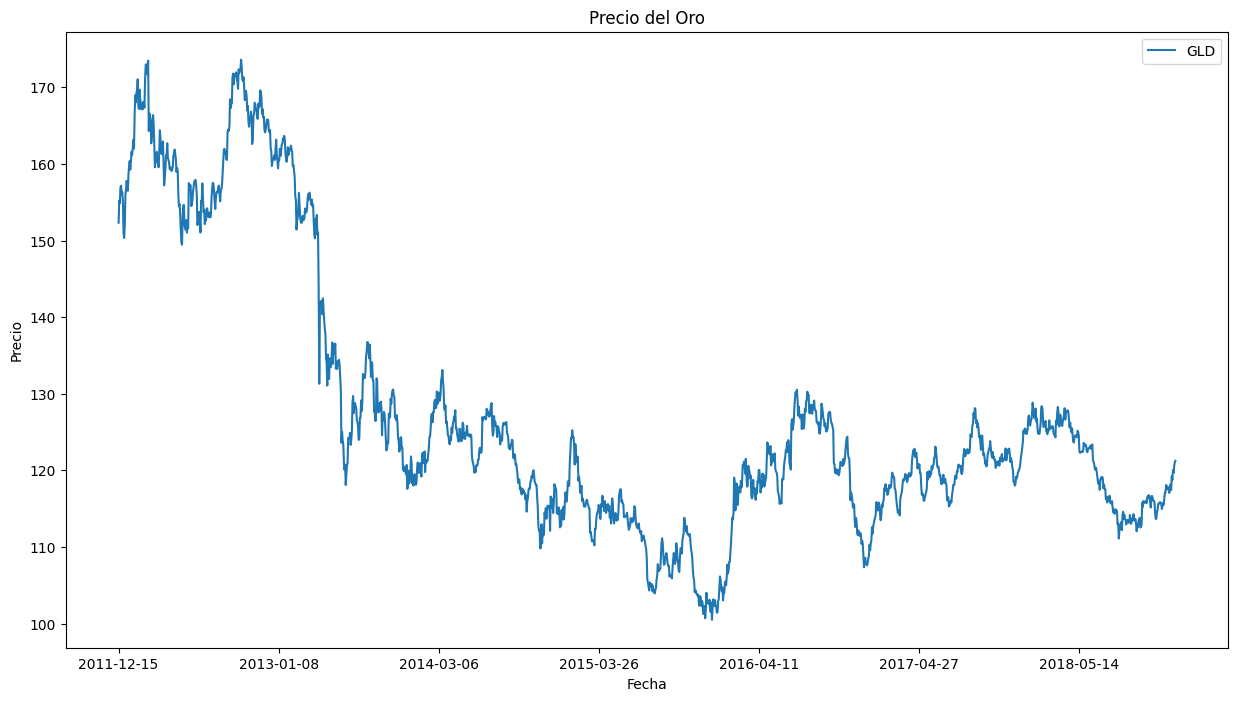

In [8]:
# Selecciona solo los datos del precio ajustado del oro
gold_close = df['adj close']

# Grafica el precio del oro
plt.figure(figsize=(15, 8))
plt.plot(df['date'],gold_close, label='GLD')
plt.title('Precio del Oro')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(np.arange(0, len(df['date']), 260), df['date'][::260])
plt.legend()
plt.show()

In [9]:
# Selecciona todas las columnas que representan precios de cierre
columnas_cierre = [col for col in df.columns if 'close' in col]
columnas_cierre

['close',
 'adj close',
 'sp_close',
 'sp_ajclose',
 'dj_close',
 'dj_ajclose',
 'eg_close',
 'eg_ajclose',
 'gdx_close',
 'gdx_adj close',
 'uso_close',
 'uso_adj close']

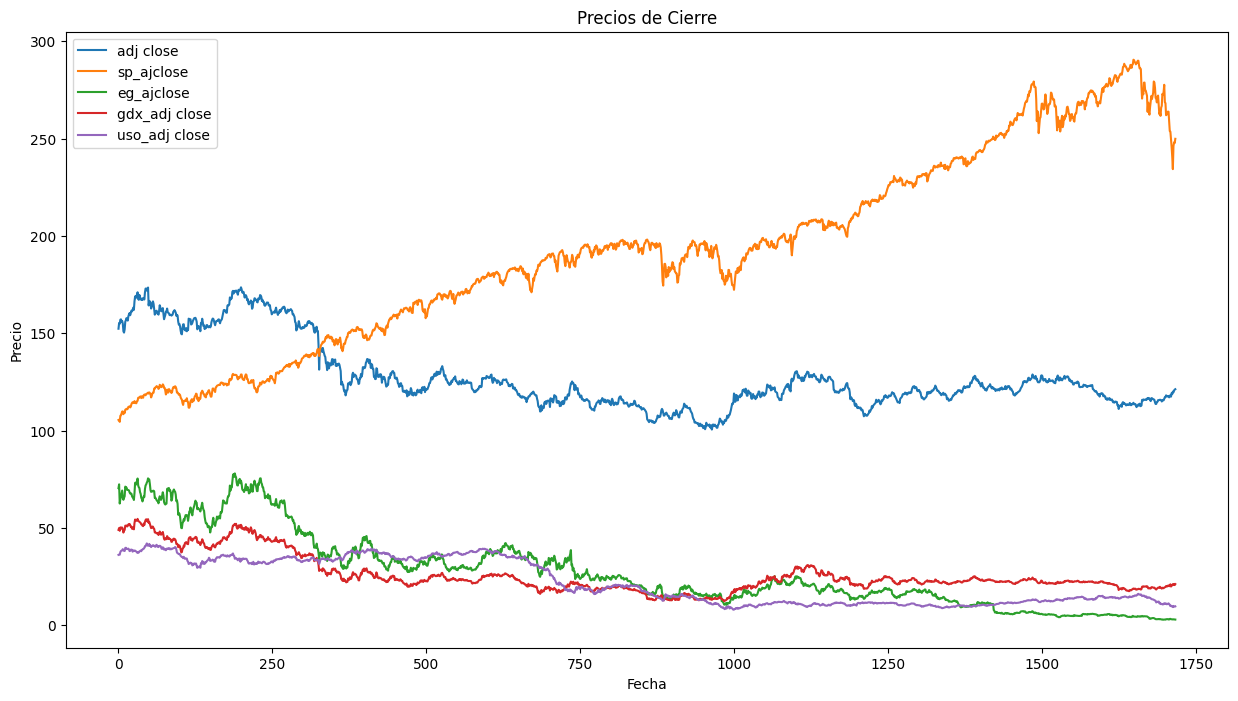

In [10]:
# sin dj porque su precio es muy alto y no se puede apreciar el resto de precios
columnas_cierre_sin_dj =['adj close',
                'sp_ajclose',
                'eg_ajclose',
                'gdx_adj close',
                'uso_adj close']
# Grafica cada precio de cierre
plt.figure(figsize=(15, 8))
for columna in columnas_cierre_sin_dj:
    plt.plot(df.index, df[columna], label=columna)

plt.title('Precios de Cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()

In [11]:
from sklearn.preprocessing import MinMaxScaler 
# los precios de sp son muy altos, por lo que se escala, para
# que se puedan visualizar mejor
df_scaler = df.copy()
scaler = MinMaxScaler()
df_scaler[columnas_cierre] = scaler.fit_transform(df_scaler[columnas_cierre])


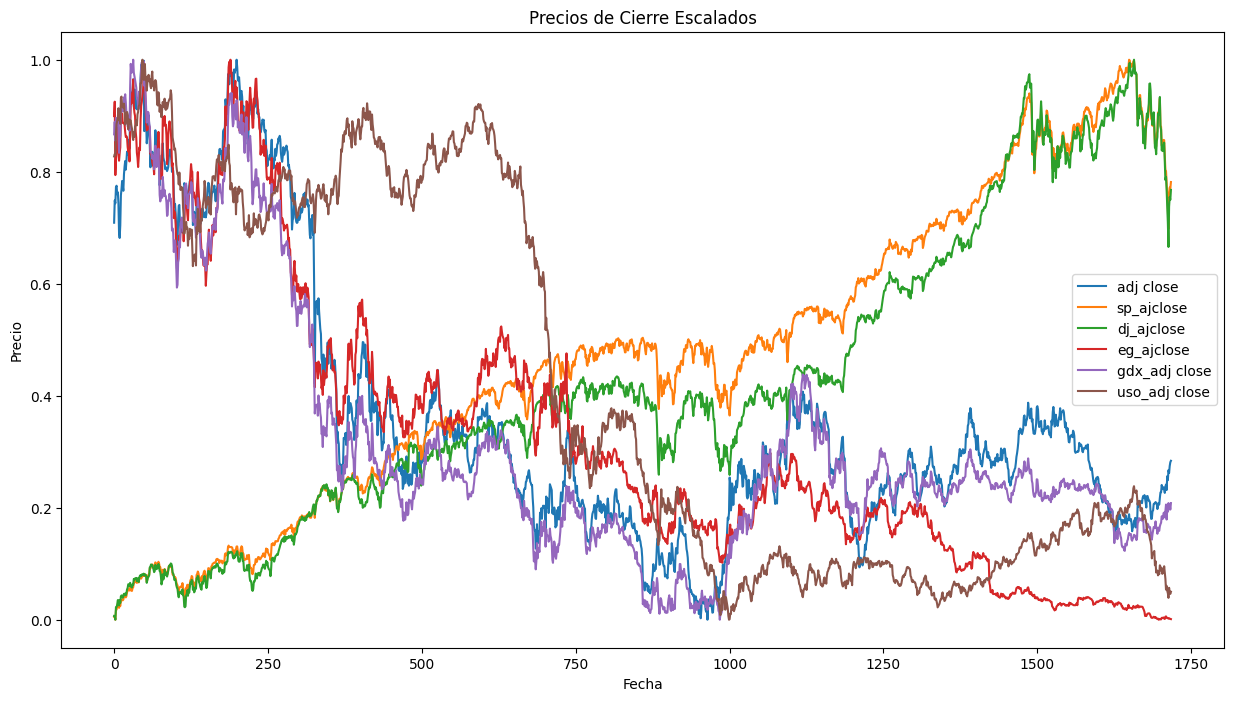

In [12]:
# Grafica cada precio de cierre
columnas_cierre =['adj close',
                'sp_ajclose',
                'dj_ajclose',
                'eg_ajclose',
                'gdx_adj close',
                'uso_adj close']
plt.figure(figsize=(15, 8))
for columna in columnas_cierre:
    plt.plot(df_scaler.index, df_scaler[columna], label=columna)

plt.title('Precios de Cierre Escalados')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()

Los activos S&P 500 y el Dow Jones Industrial Average respectivamente, parecen seguir tendencias muy similares a lo largo del tiempo, lo cual es de esperar dado que ambos reflejan el desempeño del mercado de valores de Estados Unidos y a menudo están correlacionados.

La línea gdx_adj close parece tener una tendencia menos correlacionada con los índices sp_adjclose y dj_adjclose, lo cual también es consistente con la naturaleza de un ETF de mineros de oro, ya que el precio del oro y las acciones de los mineros de oro pueden ser influenciados por diferentes factores que los del mercado de valores general.

El uso_adj close, que presumiblemente representa el United States Oil Fund, muestra una tendencia diferente a la de los índices de acciones. Esto también es esperado, ya que el precio del petróleo puede ser afectado por una variedad de factores geopolíticos y de oferta y demanda que no necesariamente impactan directamente en el mercado de valores.

Por último, el activo etiquetado como eg_adjclose presenta un patrón único comparado con los otros activos. No tengo suficiente información para determinar a qué se refiere eg, pero su tendencia es claramente distinta.

Hacia el final del gráfico, podemos ver que todos los activos excepto el eg_adjclose muestran un descenso, lo cual podría indicar una caída general del mercado o una corrección. La línea eg_adjclose, por otro lado, muestra un patrón de volatilidad y finalmente un descenso pronunciado

### Retornos

<Figure size 1500x1000 with 0 Axes>

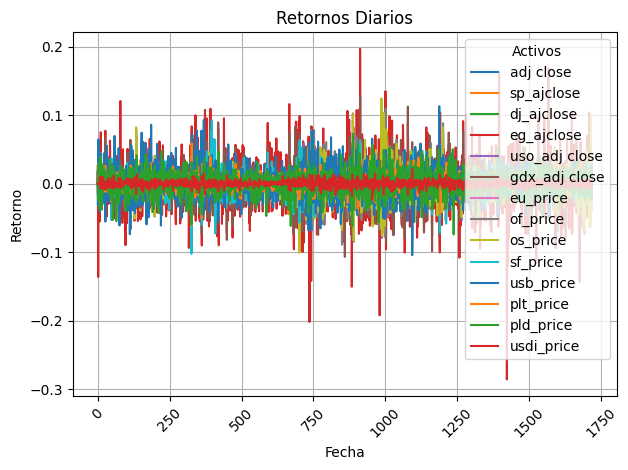

In [13]:
def retornos(df):
    # Calcula el retorno diario para todo el DataFrame
    retorno = df.pct_change().fillna(0)
    return retorno

columns_of_interest = [
    "adj close",
    "sp_ajclose",
    "dj_ajclose",
    "eg_ajclose",
    "uso_adj close",
    "gdx_adj close",
    "eu_price",
    "of_price",
    "os_price",
    "sf_price",
    "usb_price",
    "plt_price",
    "pld_price",
    "usdi_price",
]
df_cierre = df[columns_of_interest]


# Calculamos el retorno diario para todas las columnas de una vez
daily_returns = retornos(df_cierre)

# Graficar los retornos diarios usando las capacidades de plotting de pandas
plt.figure(figsize=(15, 10))
daily_returns.plot(title='Retornos Diarios')
plt.xlabel('Fecha')
plt.ylabel('Retorno')
plt.legend(title='Activos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Indicadores Técnicos
En este apartado, es crucial abordar los indicadores técnicos, dado que son herramientas fundamentales para analizar patrones en series temporales. Estos indicadores permiten una mejor comprensión de las tendencias y patrones subyacentes en los datos, lo que a su vez facilita la predicción más precisa del modelo en cuestión.





In [14]:
#TODO: Apartir de la libreria ta elaborar un analisis tecnico de los datos e incluirlos en los features (X)
# para la predicción del modelo

**Indicadores Técnicos a Considerar:**

Media Móvil Exponencial (EMA)

Promedio Móvil Ponderado (WMA)

Bandas de Bollinger

RSI (Relative Strength Index)

In [15]:
print(df_cierre.head())

    adj close  sp_ajclose   dj_ajclose  eg_ajclose  uso_adj close  \
0  152.330002  105.441238  11868.80957   70.431755      36.130001   
1  155.229996  105.597549  11866.38965   72.364037      36.270000   
2  154.869995  104.468536  11766.25977   62.509384      36.200001   
3  156.979996  107.629784  12103.58008   64.731514      37.560001   
4  157.160004  107.838242  12107.74023   66.180725      38.110001   

   gdx_adj close  eu_price  of_price  os_price  sf_price  usb_price  \
0      48.973877    1.3018    105.09     93.42     53604      1.911   
1      49.921513    1.3035    103.35     93.79     53458      1.851   
2      48.490578    1.2995    103.64     94.09     52961      1.810   
3      50.215282    1.3079    106.73     95.55     53487      1.927   
4      50.186852    1.3045    107.71     99.01     53148      1.970   

   plt_price  pld_price  usdi_price  
0    1414.65     618.85      80.341  
1    1420.25     623.65      80.249  
2    1411.10     608.80      80.207  
3    1

In [16]:
#Cálculo de Media Móvil Exponencial (EMA)
def calculate_ema(data, window):
    ema = data.ewm(span=window, adjust=False).mean()
    return ema

# Calculando la EMA con una ventana de 20 días
window = 20
df_cierre['EMA'] = calculate_ema(df_cierre['adj close'], window)

/tmp/ipykernel_33868/2532841645.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cierre['EMA'] = calculate_ema(df_cierre['adj close'], window)


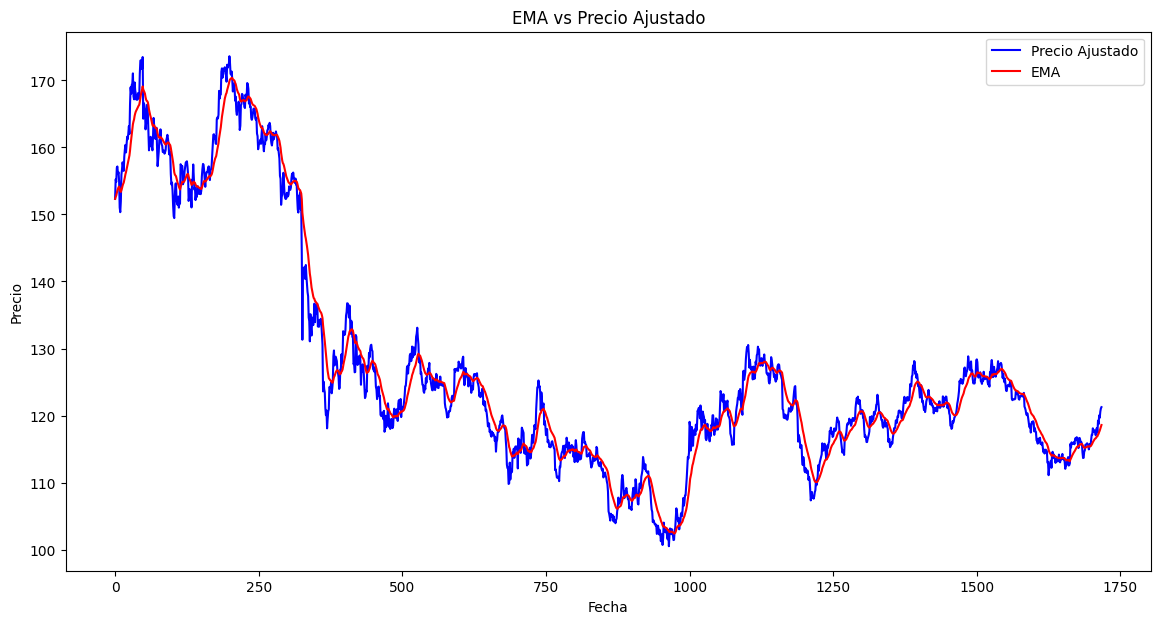

In [17]:
def plot_moving_average(data, indicator_name):
    plt.figure(figsize=(14,7))
    plt.plot(data['adj close'], label='Precio Ajustado', color='blue')
    plt.plot(data[indicator_name], label=indicator_name, color='red')
    plt.title(f'{indicator_name} vs Precio Ajustado')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.show()

# Visualizando EMA
plot_moving_average(df_cierre, 'EMA')


**Analisis Correspondiente**

Dado que el EMA da una ponderación más alta a los valores mas cercanos, lo que significa que reacciona más rápidamente a los cambios recientes en el precio, al ver el grafico podemos decir que es un buen indicador. Al observar la gráfica podemos notar una alineación bastante cercana entre ambos indicadores. Esta alineación sugiere que el EMA ha sido efectivo para suavizar las fluctuaciones de corto plazo del precio, permitiendo una visualización más clara de la tendencia general del mercado.

De igual manera como reacciona más rapido a los cambios de precios puede dar señales de compra/venta más efectivos ante los cambios en el mercado.

In [18]:
#Calculo Promedio Móvil Ponderado (WMA)

def calculate_wma(data, window):
    weights = np.arange(1, window + 1)
    wma = data.rolling(window=window).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)
    return wma

# El WMA con una ventana de 20 días
window = 20
df_cierre['WMA'] = calculate_wma(df_cierre['adj close'], window)

/tmp/ipykernel_33868/350072059.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cierre['WMA'] = calculate_wma(df_cierre['adj close'], window)


In [19]:
# Calculo de las Bandas de Bollinger
def calculate_bollinger_bands(data, window, std_multiplier):
    sma = data.rolling(window=window).mean()
    std = data.rolling(window=window).std()
    
    upper_band = sma + (std * std_multiplier)
    lower_band = sma - (std * std_multiplier)
    
    return sma, upper_band, lower_band

# Añadir las Bandas de Bollinger al DataFrame
window = 20
std_multiplier = 2
df_cierre['SMA'], df_cierre['Upper'], df_cierre['Lower'] = calculate_bollinger_bands(df_cierre['adj close'], window, std_multiplier)


/tmp/ipykernel_33868/3367985146.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cierre['SMA'], df_cierre['Upper'], df_cierre['Lower'] = calculate_bollinger_bands(df_cierre['adj close'], window, std_multiplier)
/tmp/ipykernel_33868/3367985146.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cierre['SMA'], df_cierre['Upper'], df_cierre['Lower'] = calculate_bollinger_bands(df_cierre['adj close'], window, std_multiplier)
/tmp/ipykernel_33868/3367985146.py:14: SettingWithCopyWarning: 
A value is t

In [20]:
# Calculo del indice de la fuerza relativa (RSI)

close_prices = df_cierre['adj close']

# Calculamos el cambio diario en los precios
delta = close_prices.diff(1)

# Definimos el período de cálculo del RSI que seran 14 días
period = 14

# Calculamos las ganancias y pérdidas
gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

# Calculamos el RSI
rs = gain / loss
rsi = 100 - (100 / (1 + rs))

# Agregamos el RSI al DataFrame
df_cierre['RSI'] = rsi

# Eliminar las filas con NaN después de calcular los indicadores
df_cierre.dropna(inplace=True)

/tmp/ipykernel_33868/4136372601.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cierre['RSI'] = rsi
/tmp/ipykernel_33868/4136372601.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cierre.dropna(inplace=True)


       adj close         WMA
19    159.259995  156.799619
20    160.500000  157.231762
21    161.600006  157.729762
22    161.220001  158.161239
23    162.070007  158.643430
...          ...         ...
1713  120.019997  117.893714
1714  119.660004  118.123048
1715  120.570000  118.419905
1716  121.059998  118.736667
1717  121.250000  119.044476

[1699 rows x 2 columns]


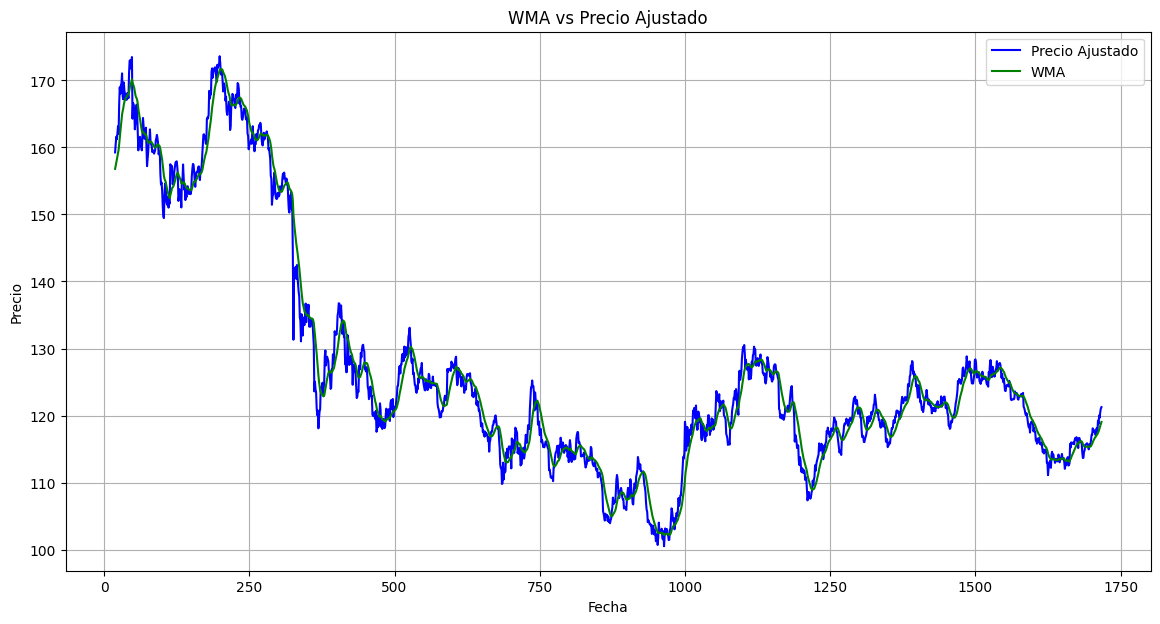

In [21]:
# Visualizar el dataframe y el WMA
print(df_cierre[['adj close', 'WMA']])

# Gráfica del WMA y el precio ajustado del oro
plt.figure(figsize=(14,7))
plt.plot(df_cierre['adj close'], label='Precio Ajustado', color='blue')
plt.plot(df_cierre['WMA'], label='WMA', color='green')
plt.title('WMA vs Precio Ajustado')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()


**Análisis Correspondiente**

Al igual que en el EMA podemos observar que se alinea a las tendencias de los precios solo que es más preciso en los picos alcistas o bajistas.
Asimismo, debido a su cálculo basado en un promedio ponderado, el WMA tiende a generar señales de compra/venta más estables y menos sensibles a los movimientos de precio a corto plazo.

Cabe aclarar que la elección de los 20 días se escogió porque es comunemente usada en los calendarios financieros y porque facilita la interpretación, por otro lado permite un equilibro entre la sensibilidad a indentificar tendencias y el suavizado.

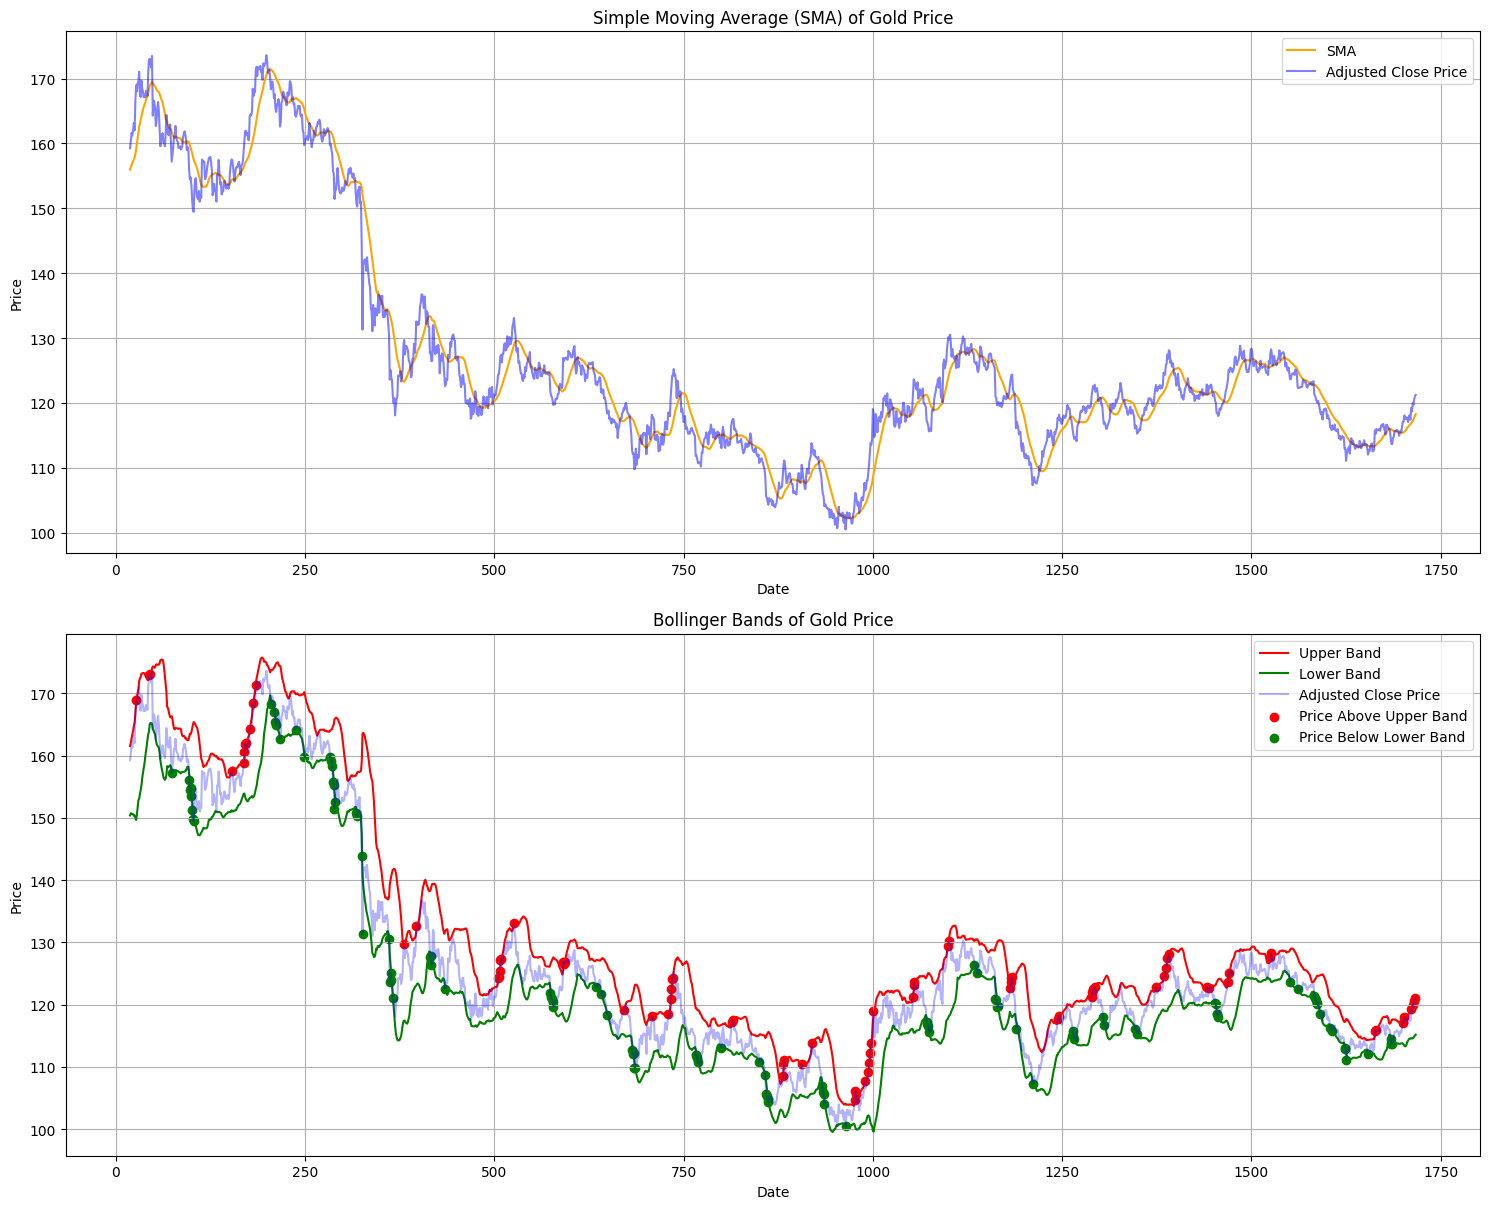

In [22]:
# Configuración del tamaño de los gráficos
plt.figure(figsize=(15, 18))

# Gráfico de la Media Móvil Simple (SMA)
plt.subplot(3, 1, 2)
plt.title('Simple Moving Average (SMA) of Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.plot(df_cierre.index, df_cierre['SMA'], label='SMA', color='orange')
plt.plot(df_cierre.index, df_cierre['adj close'], label='Adjusted Close Price', color='blue', alpha=0.5)  # añadir el precio ajustado como referencia
plt.legend()

# Gráfico de las Bandas de Bollinger
plt.subplot(3, 1, 3)
plt.title('Bollinger Bands of Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.plot(df_cierre.index, df_cierre['Upper'], label='Upper Band', color='red')
plt.plot(df_cierre.index, df_cierre['Lower'], label='Lower Band', color='green')
plt.plot(df_cierre.index, df_cierre['adj close'], label='Adjusted Close Price', color='blue', alpha=0.3)  # añadir el precio ajustado como referencia

# Señales donde el precio cruza las bandas
plt.scatter(df_cierre[df_cierre['adj close'] > df_cierre['Upper']].index, 
            df_cierre[df_cierre['adj close'] > df_cierre['Upper']]['adj close'], 
            marker='o', color='red', label='Price Above Upper Band')

plt.scatter(df_cierre[df_cierre['adj close'] < df_cierre['Lower']].index, 
            df_cierre[df_cierre['adj close'] < df_cierre['Lower']]['adj close'], 
            marker='o', color='green', label='Price Below Lower Band')

plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


**Análisis correspondiente**

El principal objetivo de este indicador es analizar los niveles de volatilidad y tambien poder identificar las señales de compra/venta en el mercado del oro. Los niveles donde el precio toca las bandas de Bollinger pueden indicar sobrecompra (cerca de la Banda Superior) o sobreventa (cerca de la Banda Inferior), cuando se pasan esos limites (los puntos que vemos en rojo y verde) se espera que los precios bajen o suban en un futuro cercano respectivamente, que es lo que podemos observar en la grafica "Bollinger Bands of Gold Price", es aqui donde indentificamos las señales de compra/venta, una vez se han sobrepasado esos limites( banda superior y inferior), si el precio cruza la banda inferior hacia arriba es una señal de compra,por el contrario, si el precio cruza la banda superior hacia abajo es una señal de venta. 
En ultimas los cortes que vemos en rojo y verde nos indican cual va ser la tendencia del mercado y el limite en el cual debido a una sobrecompra o sobreventa, se va a empezar a vender o a comprar respectivamente.

In [23]:
#Para el calculo de la volatilidad de las bandas de bollinger

# Cálculo el ancho de las bandas
df_cierre['Band Width'] = ((df_cierre['Upper'] - df_cierre['Lower']) / df_cierre['SMA']) * 100

# Cálculo de la Desviación Estándar
df_cierre['Standard Deviation'] = df_cierre['adj close'].rolling(window=20).std()

# Clasificación de la Volatilidad
def classify_volatility(band_width, std_dev):
    if band_width > 10 or std_dev > 2:
        return 'Alta Volatilidad'
    elif (5 < band_width <= 10) or (1 < std_dev <= 2):
        return 'Volatilidad Moderada'
    else:
        return 'Baja Volatilidad'

# Agregar la columna 'Volatility' al DataFrame df_cierre
df_cierre['Volatility'] = df_cierre.apply(lambda row: classify_volatility(row['Band Width'], row['Standard Deviation']), axis=1)

/tmp/ipykernel_33868/2531588814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cierre['Band Width'] = ((df_cierre['Upper'] - df_cierre['Lower']) / df_cierre['SMA']) * 100
/tmp/ipykernel_33868/2531588814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cierre['Standard Deviation'] = df_cierre['adj close'].rolling(window=20).std()
/tmp/ipykernel_33868/2531588814.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

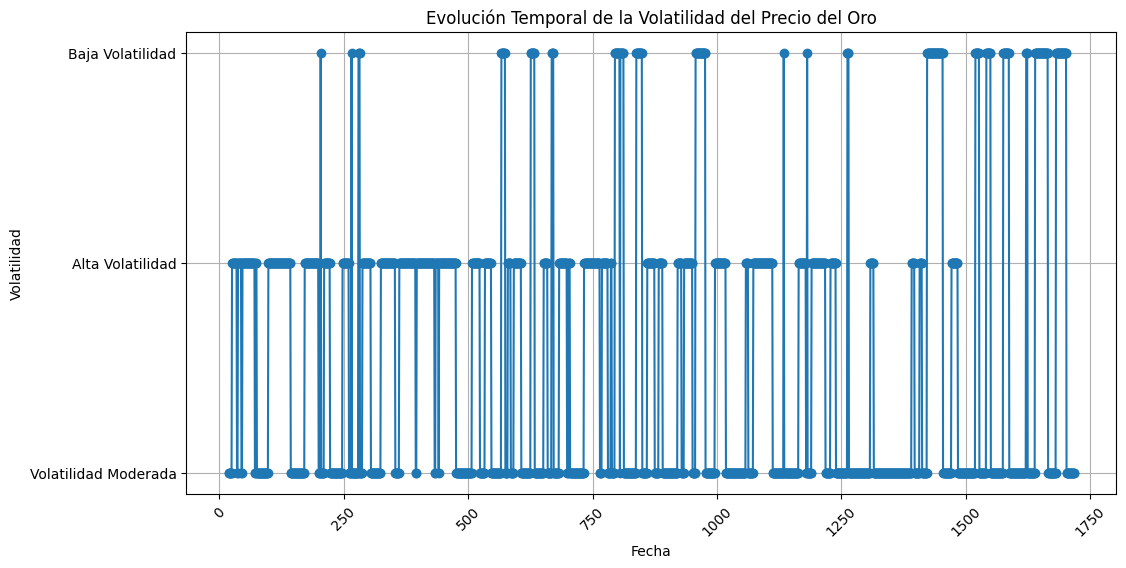

In [24]:
# Crear un gráfico de líneas para visualizar la evolución temporal de la volatilidad
plt.figure(figsize=(12, 6))
plt.plot(df_cierre.index, df_cierre['Volatility'], marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.title('Evolución Temporal de la Volatilidad del Precio del Oro')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Analisis correspondiente**

Como podemos observar la volatilidad que esta dada por el ancho de las bandas y la desviación estandar de los 20 dias anteriores es mayormente moderada en los precios de oro, seguida de una volatilidad alta de los precios históricos.

In [25]:
#Eliminamos las columnas del ejercicio anterior para evitar problemas en los modelos 
df_cierre = df_cierre.drop(['Band Width', 'Standard Deviation', 'Volatility'], axis=1)

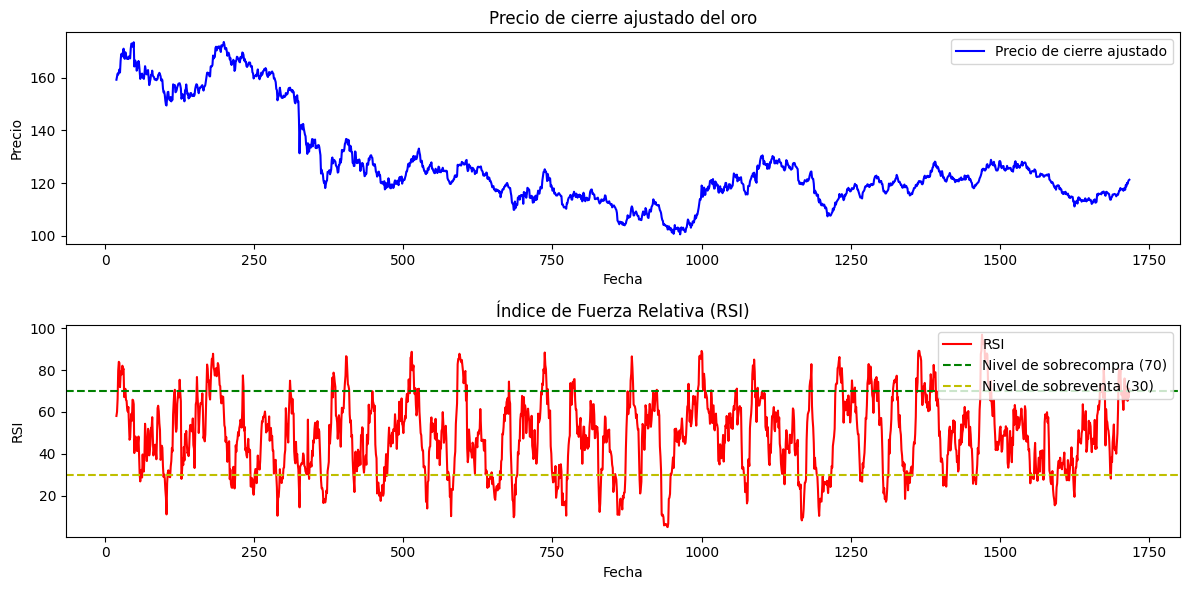

In [26]:
# Graficar los precios de cierre ajustados del oro y el RSI
plt.figure(figsize=(12, 6))

# Precios de cierre ajustados del oro
plt.subplot(2, 1, 1)
plt.plot(df_cierre['adj close'], label='Precio de cierre ajustado', color='b')
plt.title('Precio de cierre ajustado del oro')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()

# RSI
plt.subplot(2, 1, 2)
plt.plot(df_cierre['RSI'], label='RSI', color='r')
plt.axhline(70, linestyle='--', color='g', label='Nivel de sobrecompra (70)')
plt.axhline(30, linestyle='--', color='y', label='Nivel de sobreventa (30)')
plt.title('Índice de Fuerza Relativa (RSI)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()

plt.tight_layout()
plt.show()

**Análisis Correspondiente**

Para el calculo hallamos las ganancias y pérdidas diarias tomando la diferencia entre los precios de cierre consecutivos, después se calcula el promedio de las ganancias y el promedio de las pérdidas durante el período especificado (comúnmente 14 días). Finalmente se calcula el RS dividiendo el promedio de las ganancias entre el promedio de las pérdidas.

En la formulación del indicador RSI vemos que oscila entre 0 y 100. Esta escala de 0 a 100 es la base para interpretar los niveles de sobrecompra y sobreventa del RS, normalmente se considera que está en condiciones de sobrecompra cuando alcanza o supera el nivel de 70. Esto sugiere que el activo podría estar sobrevalorado y que podría haber una posible tendencia a que el precio baje.

Por otro lado, se considera que el RSI está en condiciones de sobreventa cuando cae por debajo del nivel de 30. Esto sugiere que el precio del oro podría estar infravalorado y que podría haber una posible alza del mismo.

Esto es particularmente importante porque al igual que las bandas de bollinger pueden funcionar como un criterio de inversión y señales de compra/venta en caso de que se superen esos limites.

In [27]:
print(df_cierre.head())

     adj close  sp_ajclose   dj_ajclose  eg_ajclose  uso_adj close  \
19  159.259995  111.893974  12422.05957   67.629936      38.160000   
20  160.500000  112.328224  12482.07031   67.726555      38.790001   
21  161.600006  113.570152  12578.95020   67.581627      38.830002   
22  161.220001  114.169380  12623.98047   66.277336      38.689999   
23  162.070007  114.594948  12720.48047   65.649345      37.779999   

    gdx_adj close  eu_price  of_price  os_price  sf_price  usb_price  \
19      51.366817    1.2677    110.44     99.05     52001      1.871   
20      50.540005    1.2740    111.53    101.00     53207      1.858   
21      50.597027    1.2854    110.66    101.14     53428      1.898   
22      49.561138    1.2965    111.55    100.36     53387      1.982   
23      49.589649    1.2938    109.86     98.14     54825      2.025   

    plt_price  pld_price  usdi_price         EMA         WMA         SMA  \
19    1493.45      639.8      81.791  156.315239  156.799619  155.9624

## Modelos

En esta sección de modelos, se implementarán seis modelos diferentes y se evaluará su desempeño utilizando métricas como el Error Cuadrático Medio (MSE) y la Raíz del Error Cuadrático Medio (RMSE). Estas métricas nos proporcionarán una medida cuantitativa de la precisión de cada modelo, lo que nos permitirá comparar y seleccionar el mejor en función de su capacidad para minimizar la discrepancia entre los valores observados y los predichos.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import dates as mdates
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [29]:
df_cierre

,adj close,sp_ajclose,dj_ajclose,eg_ajclose,uso_adj close,gdx_adj close,eu_price,of_price,os_price,sf_price,usb_price,plt_price,pld_price,usdi_price,EMA,WMA,SMA,Upper,Lower,RSI
19,159.259995,111.893974,12422.05957,67.629936,38.160000,51.366817,1.2677,110.44,99.05,52001,1.871,1493.45,639.8,81.791,156.315239,156.799619,155.962499,161.531934,150.393064,58.066128
20,160.500000,112.328224,12482.07031,67.726555,38.790001,50.540005,1.2740,111.53,101.00,53207,1.858,1528.40,652.9,81.429,156.713788,157.231762,156.370999,162.016581,150.725418,60.009549
21,161.600006,113.570152,12578.95020,67.581627,38.830002,50.597027,1.2854,110.66,101.14,53428,1.898,1527.95,668.3,80.822,157.179142,157.729762,156.689500,162.766316,150.612683,66.214228
22,161.220001,114.169380,12623.98047,66.277336,38.689999,49.561138,1.2965,111.55,100.36,53387,1.982,1524.75,675.2,80.405,157.563986,158.161239,157.007000,163.341622,150.672378,79.743084
23,162.070007,114.594948,12720.48047,65.649345,37.779999,49.589649,1.2938,109.86,98.14,54825,2.025,1537.90,678.2,80.406,157.993130,158.643430,157.261501,163.988402,150.534599,83.921297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,120.019997,234.339996,21792.19922,2.950000,9.290000,21.090000,1.1400,50.47,42.27,37541,2.736,788.40,1172.8,96.007,117.546698,117.893714,117.252000,119.916350,114.587649,70.867043
1714,119.660004,246.179993,22878.44922,3.000000,9.900000,20.620001,1.1353,54.47,46.39,38253,2.810,799.25,1190.1,96.568,117.747965,118.123048,117.453000,120.210231,114.695769,65.301246
1715,120.570000,248.070007,23138.82031,2.950000,9.620000,20.969999,1.1430,52.16,45.23,38690,2.774,795.50,1196.0,96.001,118.016730,118.419905,117.734000,120.561775,114.906225,68.661633
1716,121.059998,247.750000,23062.40039,2.900000,9.530000,20.600000,1.1438,52.20,44.92,38706,2.716,790.25,1185.2,95.965,118.306565,118.736667,118.018000,120.987682,115.048318,67.010356


In [30]:
# Selecciona las columnas de interés
X = df_cierre.drop(columns=['adj close'])

# columna objetivo
y = df_cierre[['adj close']]
# Define el tamaño del conjunto de prueba como una proporción del conjunto de datos completo
test_size = 0.2

# Calcula el índice en el que se debe dividir el conjunto de datos para obtener la proporción deseada
split_idx = int(X.shape[0] * (1 - test_size))

# Divide los datos en entrenamiento y prueba sin mezclar
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

### Regresión Lineal

In [31]:
# inicializar los diccionarios para guardar los resultados
mse_dict = {}
rmse_dict = {}

# Función para ver el rendimiento del modelo
def rendimiento_modelo(model, model_name,mse_dict, rmse_dict):
    # Predicciones
    predicted = model.predict(X_test)
    # Rsmse and R2 score
    RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
    # Imprimir los resultados
    print("Rendimiento del modelo")
    print("--------------------------------------")
    mse = mean_squared_error(y_test, predicted)
    print(f"MSE      : {mse:.2f}")
    print(f'RMSE     : {RSME_score:.2f}')
    R2_score = r2_score(y_test, predicted)
    print(f'R2 score : {R2_score:.2f}')
    print("--------------------------------------")
    
    # Guardar los resultados
    mse_dict[model_name] = mse
    rmse_dict[model_name] = RSME_score
    
    # Graficar los resultados
    # Predicciones vs Actual
    plt.figure(figsize=(16, 8))
    plt.plot(y_test.index, predicted,'red', label='Predict')
    plt.plot(y_test.index, y_test,'black', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    # 45 grados
    plt.gcf().autofmt_xdate()
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()
    


Rendimiento del modelo
--------------------------------------
MSE      : 5.72
RMSE     : 2.39
R2 score : 0.74
--------------------------------------


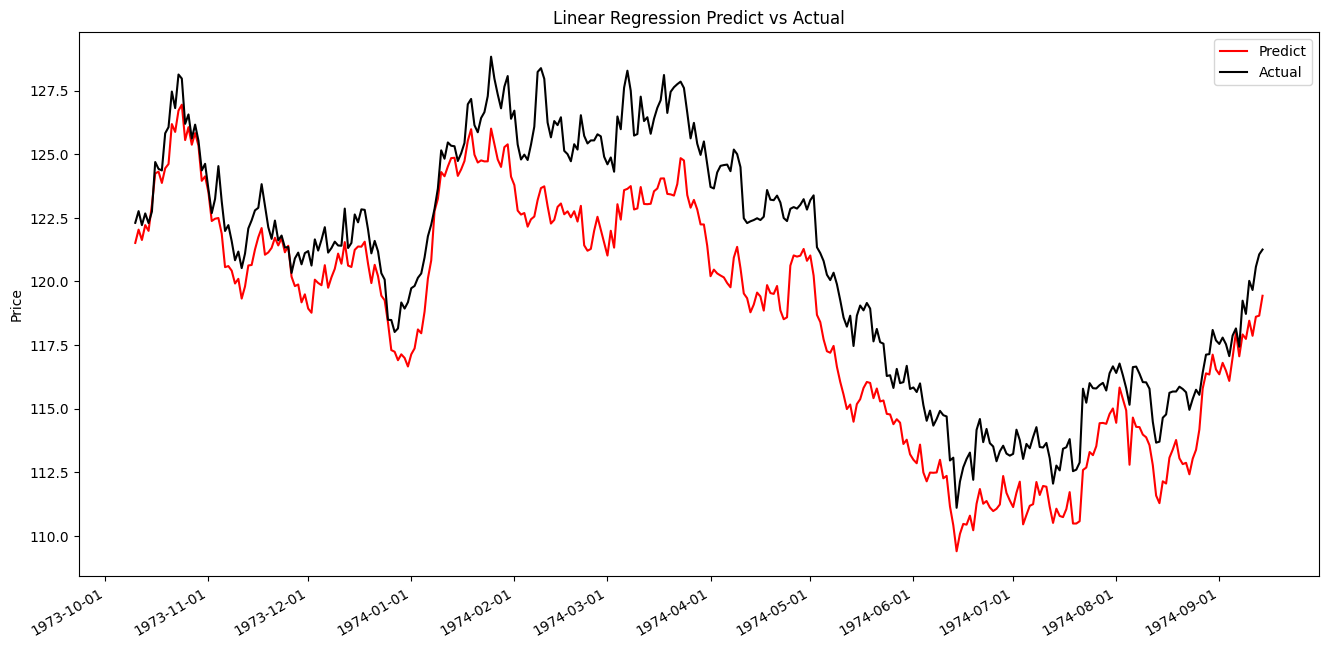

In [32]:
# modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

rendimiento_modelo(lr, "Linear Regression",mse_dict, rmse_dict)

### Regresión Lasso

In [33]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Rendimiento del modelo
--------------------------------------
MSE      : 148.56
RMSE     : 12.19
R2 score : -5.86
--------------------------------------


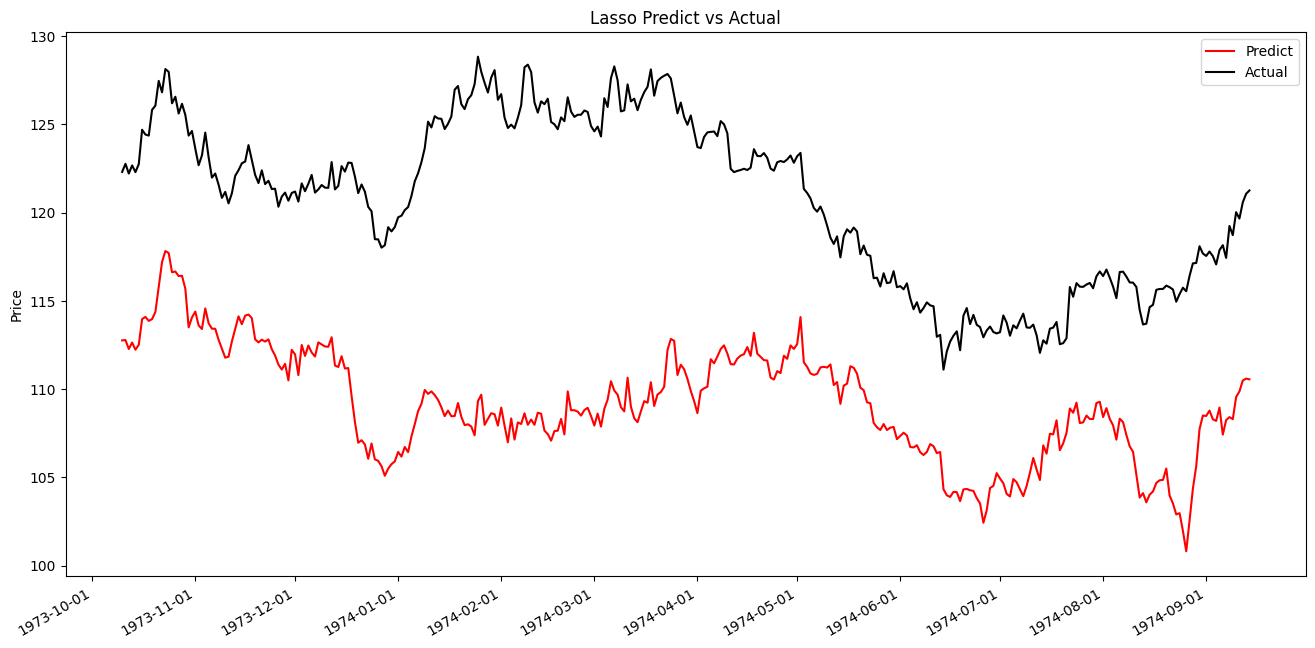

In [34]:
#TODO: Implementar un modelo de regresión lineal con regularización Lasso
lasso = LassoCV(n_alphas=5000)
lasso.fit(X_train, y_train)

rendimiento_modelo(lasso, "Lasso", mse_dict, rmse_dict)

### Regresión Ridge

Rendimiento del modelo
--------------------------------------
MSE      : 5.38
RMSE     : 2.32
R2 score : 0.75
--------------------------------------


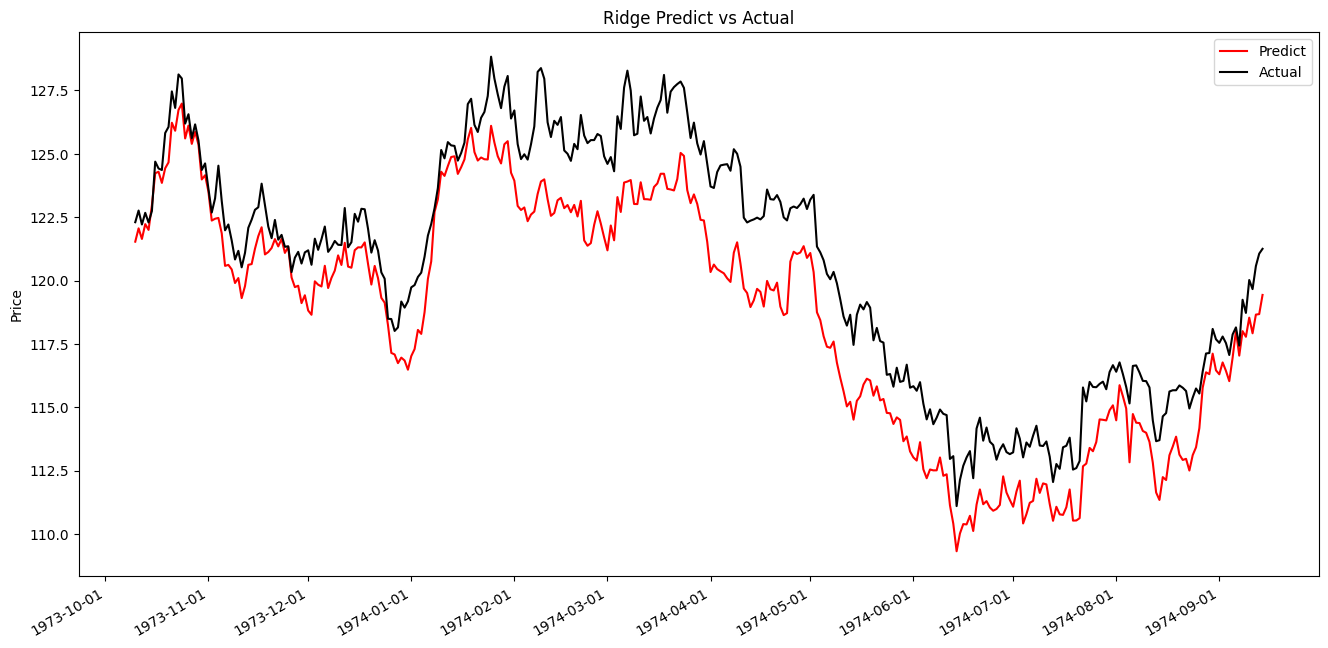

In [35]:
#TODO: Implementar un modelo de regresión lineal con regularización Ridge
r_alphas = np.logspace(0, 5, 5000) # Colocar muchos alpha para cross validation
ridgeReg = RidgeCV(alphas= r_alphas)
ridgeReg.fit(X_train, y_train)

rendimiento_modelo(ridgeReg, "Ridge",mse_dict, rmse_dict)

### Arbol de decisión

Este es un modelo de aprendizaje supervisado en donde dividimos el conjunto de datos en subconjuntos más pequeños basados en características específicas para poder clasificar y predecir los precios del oro. Posteriormente, se realizará un modelo de bosque aleatorio o random forest, que es una técnica que constituye varios árboles de decisión.

En este caso, se espera que el modelo de Bosque Aleatorio o Random Forest sea más resistente al sobreajuste en comparación con un solo árbol de decisión, lo que lo hace más adecuado para conjuntos de datos complejos con múltiples características.

Rendimiento del modelo
--------------------------------------
MSE      : 3.54
RMSE     : 1.88
R2 score : 0.84
--------------------------------------


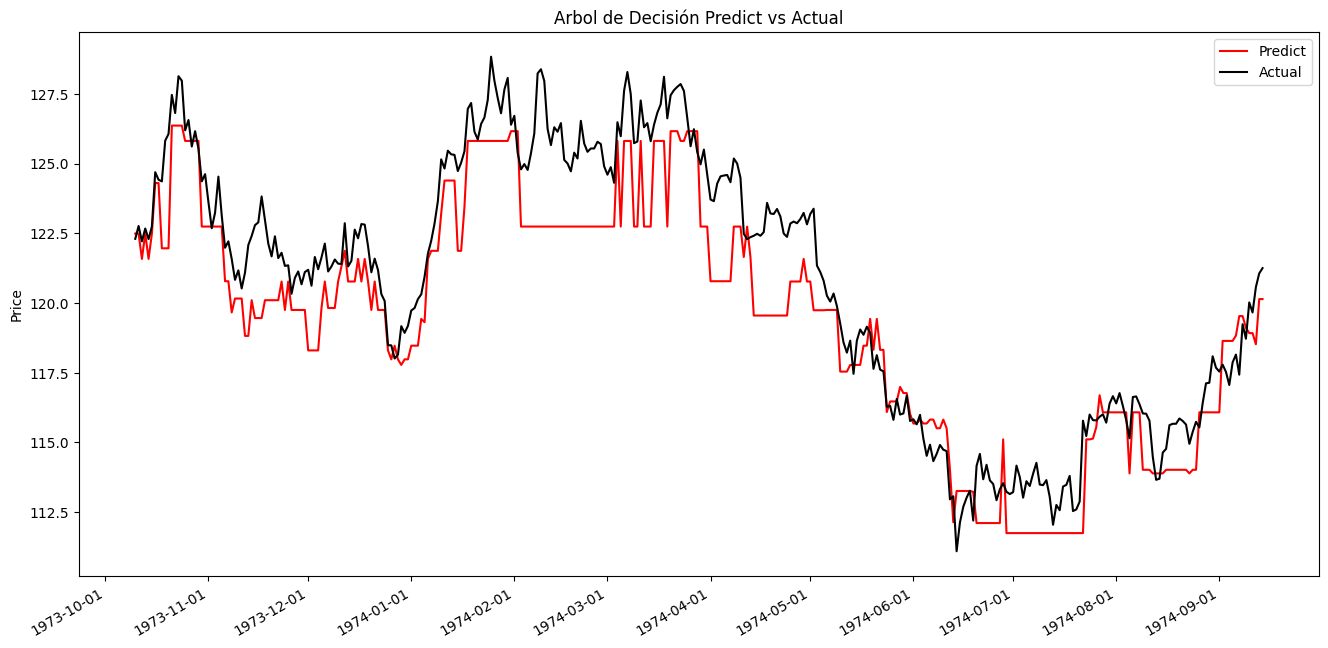

In [36]:
# Modelo de árbol de decisión
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Evaluación del modelo de árbol de decisión
rendimiento_modelo(tree_model, "Arbol de Decisión", mse_dict, rmse_dict)

### Bosque Aleatorio 

Rendimiento del modelo
--------------------------------------
MSE      : 3.65
RMSE     : 1.91
R2 score : 0.83
--------------------------------------


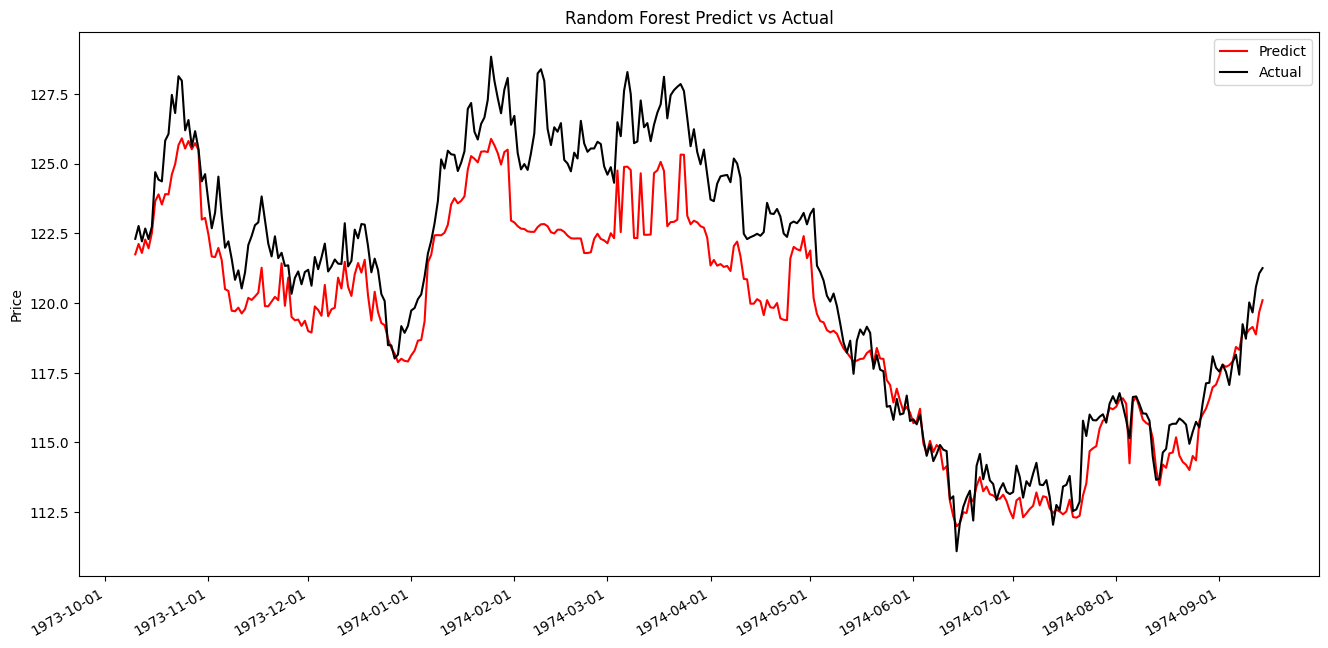

In [37]:
# Modelo de Bosque Aleatorio
random_forest_model = RandomForestRegressor()
y_train = np.ravel(y_train)
random_forest_model.fit(X_train, y_train)

# Evaluación del modelo de Bosque Aleatorio
rendimiento_modelo(random_forest_model, "Random Forest", mse_dict, rmse_dict)

Los mejores parametros fueron: {'bootstrap': True, 'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Rendimiento del modelo
--------------------------------------
MSE      : 2.98
RMSE     : 1.73
R2 score : 0.86
--------------------------------------


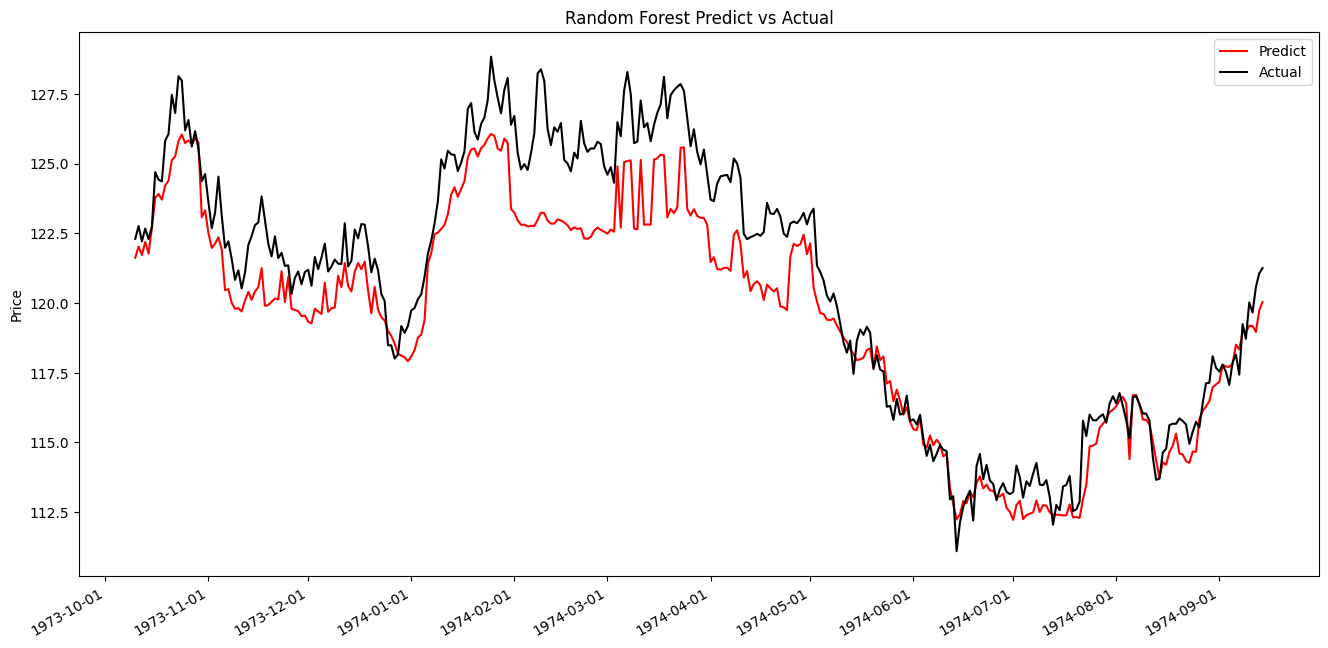

In [38]:
# Definición de la función para optimizar el modelo RandomForestRegressor usando GridSearchCV
def optimizar_random_forest(X_train, y_train):
    # Inicialización del modelo RandomForestRegressor
    rf = RandomForestRegressor()

    # Definición del diccionario de parámetros para GridSearchCV
    param_grid = {
        'n_estimators': [100, 200],        # Número de árboles en el bosque
        'max_depth': [None, 10],           # Máxima profundidad de cada árbol
        'min_samples_split': [2, 5],       # Mínimo número de muestras requeridas para dividir un nodo
        'min_samples_leaf': [1, 2],        # Mínimo número de muestras requeridas en cada hoja
        'bootstrap': [True],               # Método de muestreo de las muestras para entrenar cada árbol
        'max_leaf_nodes': [None, 50]       # Máximo número de nodos hoja
    }
    
    # Creación del objeto GridSearchCV con el modelo, los parámetros y la configuración de la validación cruzada
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=0)
    # Ejecución de la búsqueda en malla con los datos de entrenamiento
    grid_search.fit(X_train, y_train)
    # Impresión de los mejores parámetros encontrados
    print(f"Los mejores parametros fueron: {grid_search.best_params_}")
    # Retorno del mejor modelo encontrado
    return grid_search.best_estimator_

# Ejecución de la función de optimización con los datos de entrenamiento
rfgs = optimizar_random_forest(X_train, y_train)
# Evaluación del rendimiento del modelo optimizado y actualización de los diccionarios de métricas
rendimiento_modelo(rfgs, "Random Forest", mse_dict, rmse_dict)


### Gradient Boosting

In [39]:
#TODO: Implementar un modelo de potenciación de gradiente

### Extreme Gradient Boosting

Rendimiento del modelo
--------------------------------------
MSE      : 6.27
RMSE     : 2.50
R2 score : 0.71
--------------------------------------


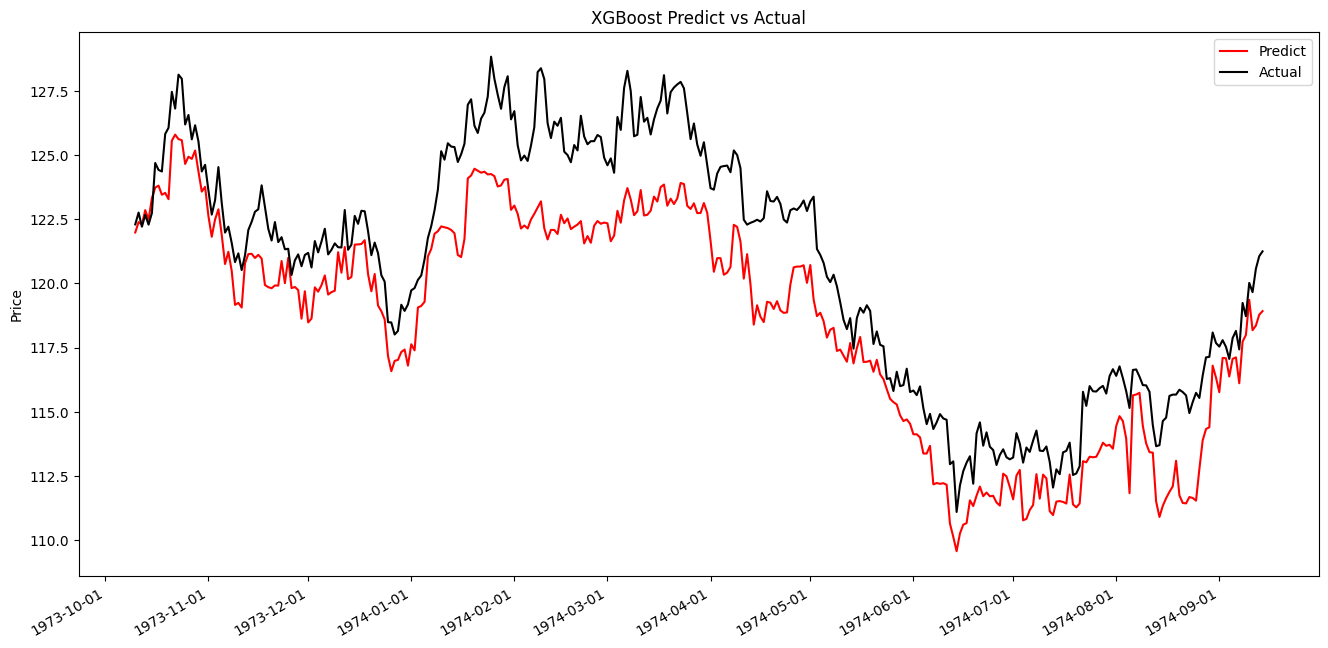

In [40]:
# se realiza el modelo de xgboost metodo de ensamble
import xgboost as xgb # type: ignore
model = xgb.XGBRegressor()

#Training the model on the training data
model.fit(X_train, y_train)
rendimiento_modelo(model, "XGBoost", mse_dict, rmse_dict)

## Deep Learning


In [41]:
# Librerias para poder correr modelos de deep learning
import itertools
import os 
import random 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN, RNN, Input, Bidirectional
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from sklearn.model_selection import GroupKFold

from tensorflow.keras.optimizers.schedules import ExponentialDecay

import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)

ModuleNotFoundError: No module named 'tensorflow'

### Long short-term memory

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Observar comportamiento de los modelos

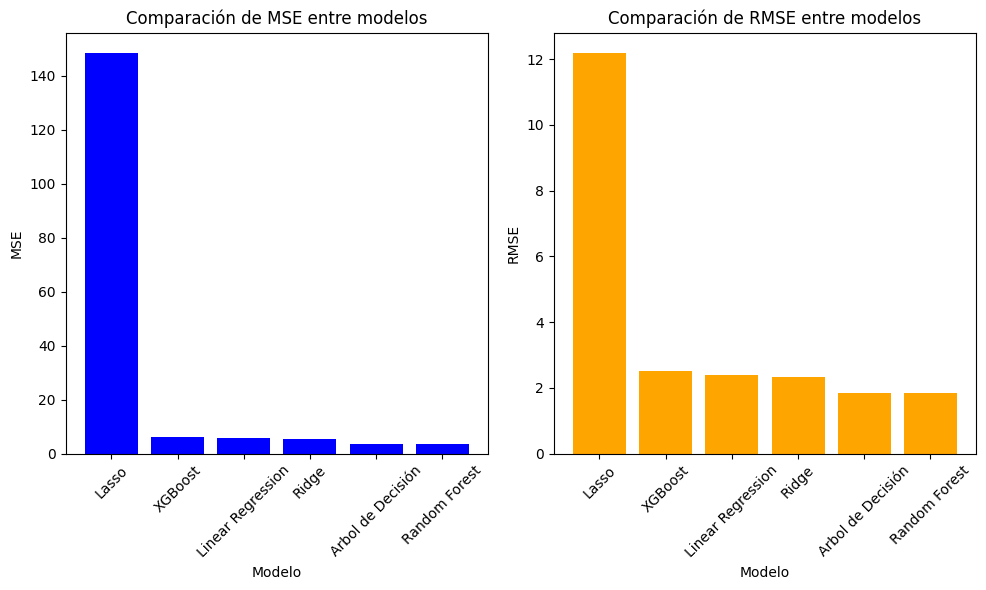

In [ ]:
# Ordenar los resultados de MSE y RMSE de mayor a menor
mse_dict = dict(sorted(mse_dict.items(), key=lambda item: item[1], reverse=True))
rmse_dict = dict(sorted(rmse_dict.items(), key=lambda item: item[1], reverse=True))


# Gráficos de barras para MSE y RMSE
plt.figure(figsize=(10, 6))

# Gráfico de barras para MSE
plt.subplot(1, 2, 1)
plt.bar(mse_dict.keys(), mse_dict.values(), color='blue')
plt.xlabel('Modelo')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre modelos')
plt.xticks(rotation=45)

# Gráfico de barras para RMSE
plt.subplot(1, 2, 2)
plt.bar(rmse_dict.keys(), rmse_dict.values(), color='orange')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.title('Comparación de RMSE entre modelos')
# 45 grados
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<div >
<img src = "./imagen_grupo.png" />
</div>